Линейная регрессия

Зависимость в среднем изменений результативного признака y от факторных признаков x1,x2,...,xn, свертка которых осуществляется на основе операций сложения или вычитания называется моделью линейной регрессии.

Оценка коэффициентов регрессии может осуществляться разными способами. Коэффициенты линейной регрессии оценивают методом наименьших квадратов, суть которого состоит в том, что находятся такие параметры модели, при которых минимизируется сумма квадратов отклонений фактических и расчетных значений результативного признака (S-критерий).

Рассмотрим следующие варианты линейной регрессии: парная, множественная, полиномиальная регрессия. Затем добавим регуляризацию для предотвращения переобучения модели. В результате получим гребневую и лассо регресию.

1. Парная регрессия

Математическое описание зависимости в среднем изменений переменной y (результативного признака) от переменной x (факторного признака) называется моделью (уравнением) парной регрессии. Чаще всего используется линейное уравнение парной регрессии:

y=ax+b

* где a - коэффициент регрессии, который показывает, на сколько единиц в среднем изменится результативный признак при изменении факторного признака на одну единицу его измерения.
* b - свободный член уравнения регрессии.

Графически линейное уравнение парной регрессии представляется прямой линией в координатной плоскости x, y.

Импортируем библиотеки, которые нам понадобятся для построения модели линейной регрессии.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

Сгенерируем 50 случайных точек в координатной плоскости x, y, которые могут быть аппроксимированы линейной моделью парной регрессии со следующими истинными значениями коэффициентов: a=2, b=-5.

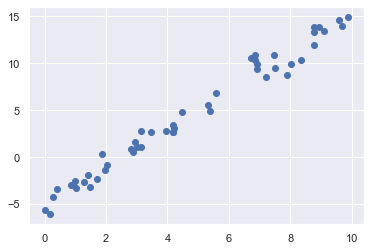

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

Воспользуемся методом LinearRegression из библиотеки Scikit-Learn для подбора параметров a и b и визуализации полученной модели.

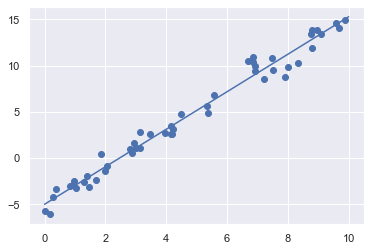

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Выведим на экран коэффициент (coef_) и свободный член (intercept_) регрессии.

In [4]:
print("Коэффициент регрессии:    ", model.coef_[0])
print("Свободный член регрессии:", model.intercept_)

Коэффициент регрессии:     2.027208810360695
Свободный член регрессии: -4.998577085553202


Видим, что результаты близки к истинным значениям параметров, которые мы задавали (a=2, b=-5).

2. Множественная регрессия

Математически множественная линейная регрессия может быть представлена в следующем виде: y=a0+a1x1+a2x2+⋯

Реализация данной модели в Python может быть осуществлена с помощью того же метода LinearRegression из библиотеки Scikit-Learn.

Графически модели множественной регрессии соответствует плоскость в n-мерном пространстве.

Сгенерируем 100 случайных точек в координатной плоскости x, y, z которые могут быть аппроксимированы линейной моделью множественной регрессии со следующими истинными коэффициентами: a0=0.5, a1=1.5, a2=-2, a3=1.

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + rng.randn(100)

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.6562333465768289
[ 1.48159542 -1.97622428  0.97258042]


3. Полиномиальная регрессия

В уавнении множественной линейной регрессии y=a0+a1x1+a2x2+a3x3+⋯ переменная xn может быть представлена любой функцией fn преобразования исходных данных x: xn=fn(x). 

В случае fn(x)=x^n получаем полиномиальную регрессию: y=a0+a1x+a2x^2+a3x^3+⋯ 

Из-за важности полиномиальной регрессии в библиотеку Scikit-Learn встроен метод PolynomialFeatures, который позволяет по исходному вектору x получить вектора x^2, x^3, ..., x^n

In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

Видим, что метод PolynomialFeatures преобразовал исходный одномерный вектор x в трехмерное пространство признаков x, x^2, x^3 путем возведения во 2-ую и 3-ю степень соответствующих значений исходного вектора. По полученным данным можно построить полиномиальную регрессию путем применения к ним метода LinearRegression из библиотеки Scikit-Learn.

Самый простой способ соединить указанные выше операции - использовать метод make_pipeline. Построим таким образом полиномиальную модель 7-го порядка:

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

Используя указанные методы, можно построить зашумленную синусоиду:

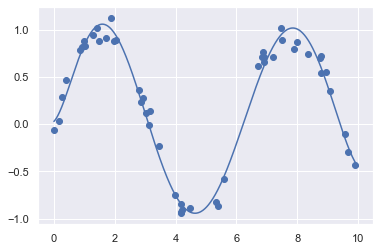

In [8]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Видим, что наша линейная модель, благодаря использованию полинома 7-го порядка, обеспечивает прекрасное приближение к нелинейным данным.

Сгенерированные данные можно также смоделировать с помощью набора гаусовских кривых.

Регуляризация

Если модель может может давать точные прогнозы на ранее не встречавшихся данных, то она обладает хорошей обобщающей способностью.

Мы имеем дело с переобучением, когда используем очень сложную модель, которая слишком точно подстраивается под особенности обучающего набора данных. В результате, модель превосходно работает на обучающем наборе, но не способна правильно обобщить результат на новые данные.

С другой стороны, выбор слишком простой модели, которая не охватывает все многообразие и изменчивость данных, называется недообучением.

Чтобы не допустить переобучения модели, проводят ее регуляризацию путем сжатия коэффициентов модели до близких к нулю значений, чтобы каждый признак имел как можно меньшее влияние на результат, и в то же время он должен по-прежнему обладать хорошей прогнозной силой.

4. Гребневая регрессия (Ridge regression, L2 Regularization)

Гребневая регрессия является линейной моделью регрессии с регуляризацией, известной как L2-регуляризация.

Регуляризация меняет критерий качества, а именно к S-критерию добаляется штраф P, который рассчитывается как произведение суммы квадратов найденных с помощью МНК параметров модели (без свободного члена) на параметр α, который контролирует силу штрафа.

Параметр α подбирают так, чтобы минимизировать ошибку на выборке валидации.

Таким образом, исходная выборка делится на 3 подвыборки: обучающая (оценка параметров модели), валидации (оценка внешних параметров, типа α), тестовая (проверка точности модели).

Модель гребневой регрессии можно построить с помощью метода Ridge из библиотеки Scikit-Learn.

In [9]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots()
    model.fit(x[:, np.newaxis], y)
    ax.scatter(x, y)
    ax.plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax.set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax.set_title(title)

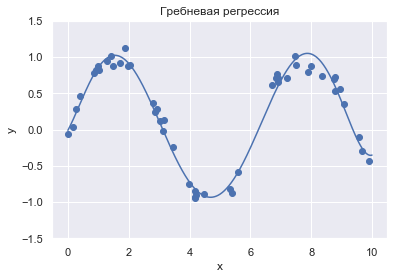

In [10]:
from sklearn.linear_model import Ridge
model = make_pipeline(PolynomialFeatures(7), Ridge(alpha=0.1))
basis_plot(model, title='Гребневая регрессия')

Параметр α контролирует сложность модели. В пределе α→0 мы получаем стандартную линейную регрессию. В пределе α→∞ все индивидуальные проявления модели будут подавлены. Достоинство гребневой регрессии состоит в том, что затраты на ее построение не намного выше, чем на построение линейной регрессии.

5. Лассо-регрессия (Lasso regression, L1 regularization)

Лассо-регрессия является линейной моделью регрессии с регуляризацией, известной как L1-регуляризация.

Как и в случае с гребневой регрессией, L1-регуляризация меняет критерий качества, но делает это иначе, а именно к S-критерию добаляется штраф P, который рассчитывается как произведение суммы модулей найденных с помощью МНК параметров модели (без свободного члена) на параметр α, который контролирует силу штрафа. 

Результат L1-регуляризации заключается в том, что коэффициенты модели сжимаются до близких к нулю значений, однако, некоторые коэффициенты становятся равными точно нулю.

Фактически получается, что некоторые признаки полностью исключаются из модели. Это можно рассматривать, как один из видов автоматического отбора признаков. В результате, выявляются наиболее важные признаки модели, упрощается ее интерпретация.

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.82619138244717, tolerance: 0.002065280097246271
  positive)


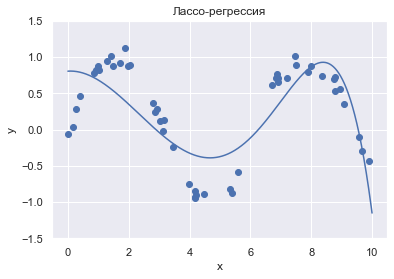

In [11]:
from sklearn.linear_model import Lasso
model = make_pipeline(PolynomialFeatures(7), Lasso(alpha=0.001))
basis_plot(model, title='Лассо-регрессия')

Как и в случае гребневой регрессии, параметр α, который регулирует силу штрафа, подбирают так, чтобы минимизировать ошибку на выборке валидации.

Пример: прогнозирование велосипедного трафика

В качестве примера посмотрим, cможем ли мы спрогнозировать количество велосипедных поездок по мосту Фримонт в Сиэтле на основе погоды, сезона и других факторов.

Начнем с загрузки двух наборов данных, разбитых по датам:

In [12]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [2]:
import pandas as pd
counts = pd.read_csv('data/FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('data/BicycleWeather.csv', index_col='DATE', parse_dates=True)